In [1]:
#in this project i will be creating a trained model using convolutional neural network(CNN) in Deep Learning which can be used 
#for predicting various fruit types
#credits to kaggle for the dataset...link...

In [2]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import pathlib
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#now i am going to convert my training and testing data directories into pathlib which makes it a little easier to access
data_dir=pathlib.Path('C://Users/sojore/Documents/fruits/train_data')
data_dir

WindowsPath('C:/Users/sojore/Documents/fruits/train_data')

In [4]:
#so now we wanna get all the images with a jpg extension on them
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/100_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/101_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/102_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/103_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/104_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/105_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/106_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/107_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/108_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/109_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Banana_Lady_Finger/110

In [5]:
#lets see the length of both training and testing datasets
len(list(data_dir.glob('*/*.jpg')))

2000

In [6]:
#so now if i wanna get only the Beetroot fruits we do the following
Dates=list(data_dir.glob('Dates/*'))
Dates[:4]

[WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Dates/152_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Dates/153_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Dates/154_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Dates/155_100.jpg')]

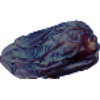

In [7]:
#next i gonna use the PIL library to show some of the above images
PIL.Image.open(str(Dates[3]))

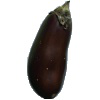

In [8]:
Eggplant=list(data_dir.glob('Eggplant/*'))
PIL.Image.open(str(Eggplant[9]))

In [9]:
#now i will create a fruits image dictionary for all available fruits
fruit_images_dict={
    'Banana_Lady_Finger':list(data_dir.glob('Banana_Lady_Finger/*')),
    'Cantaloupe_1':list(data_dir.glob('Cantaloupe_1/*')),
    'Dates':list(data_dir.glob('Dates/*')),
    'Eggplant':list(data_dir.glob('Eggplant/*')),
    'Granadilla':list(data_dir.glob('Granadilla/*')),
}

In [11]:
fruit_images_dict['Granadilla']

[WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/165_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/166_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/167_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/168_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/169_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/170_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/171_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/172_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/173_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/174_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/175_100.jpg'),
 WindowsPath('C:/Users/sojore/Documents/fruits/train_data/Granadilla/176_100

In [12]:
#i will also create fruits labels dictionary as below
fruits_labels_dict={
    'Banana_Lady_Finger':0,
    'Cantaloupe_1':1, 'Dates':2,
    'Eggplant':3,
    'Granadilla':4
}

In [13]:
#we can use the open cv module to read these files into an open cv object(sort of like a numpy array)
str(fruit_images_dict['Banana_Lady_Finger'][0])

'C:\\Users\\sojore\\Documents\\fruits\\train_data\\Banana_Lady_Finger\\100_100.jpg'

In [14]:
str(fruit_images_dict['Kohlrabi'][1])

KeyError: 'Kohlrabi'

In [15]:
img=cv2.imread(str(fruit_images_dict['Banana_Lady_Finger'][0]))
img.shape

(100, 100, 3)

In [16]:
#it seems our images have a standard dimension of 100*100*3,pretty cool uuh
#we gonna create our X_train and y_train
X,y=[],[]

for fruit_name,image in fruit_images_dict.items():
    for imag in image:
        img=cv2.imread(str(imag))
        resized_img=img
        X.append(resized_img)
        y.append(fruits_labels_dict[fruit_name])#this code i will get the number for each fruit name
        

In [17]:
#converting our X_train and y_train into a numpy array
X=np.array(X)
y=np.array(y)

In [18]:
X.shape

(2000, 100, 100, 3)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [20]:
len(X_train)

1500

In [21]:
len(X_test)

500

In [22]:
##now we need to do scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [23]:
X_train_scaled[7]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [24]:
len(y_test)

500

In [25]:
len(X_train_scaled)

1500

In [26]:
#we are now to build our model ,buh before lets do some data augmentation to control overfitting
#we gonna apply data augmentation to obtain new several samples for a better trained model
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(100,100,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

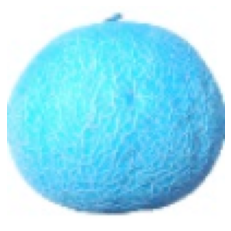

In [27]:
plt.axis('off')
plt.imshow(X_train_scaled[4])

In [28]:
import pandas as pd


In [36]:
#we can now create our model using CNN
num_classes=2
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    #add Dense network
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
47/47 [==============================] - 53s 1s/step - loss: -14.5178 - accuracy: 0.2033
Epoch 2/5
47/47 [==============================] - 46s 975ms/step - loss: -15.2696 - accuracy: 0.2020
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: -15.2696 - accuracy: 0.2020
Epoch 4/5
47/47 [==============================] - 84s 2s/step - loss: -15.2696 - accuracy: 0.2020
Epoch 5/5
47/47 [==============================] - 77s 2s/step - loss: -15.2696 - accuracy: 0.2020


In [37]:
model.evaluate(X_test_scaled,y_test)

16/16 [==============================] - 12s 459ms/step - loss: -15.1882 - accuracy: 0.1940


[-15.188241958618164, 0.1940000057220459]

In [38]:
predictions=model.predict(X_test_scaled)
predictions

array([[16.488108 , 56.62238  ],
       [17.11769  , 58.9876   ],
       [17.659763 , 61.98215  ],
       [17.427923 , 61.503292 ],
       [17.498287 , 61.45145  ],
       [17.028112 , 58.506023 ],
       [16.617357 , 57.259354 ],
       [17.107006 , 58.979748 ],
       [16.724375 , 58.2225   ],
       [16.704792 , 56.653576 ],
       [17.013216 , 58.012653 ],
       [17.643824 , 59.53506  ],
       [16.961573 , 58.290997 ],
       [16.85237  , 58.525433 ],
       [17.094183 , 58.961475 ],
       [15.943181 , 55.1255   ],
       [16.334658 , 56.097694 ],
       [17.70883  , 62.219257 ],
       [15.257248 , 52.2941   ],
       [17.602894 , 59.754505 ],
       [18.601797 , 64.627106 ],
       [14.365706 , 49.101383 ],
       [17.954016 , 62.61986  ],
       [17.176218 , 58.251316 ],
       [16.38642  , 56.33461  ],
       [19.360521 , 66.01561  ],
       [15.4633045, 53.40304  ],
       [18.766958 , 63.51477  ],
       [16.441162 , 56.381336 ],
       [19.371195 , 66.244415 ],
       [13

In [39]:
#so now if we wanna convert out predictions into a probability score we do the following
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3.7145662e-18, 1.0000000e+00], dtype=float32)>

In [41]:
np.argmax(score)

1

In [42]:
y_test[0] #for our 1st value it got it correctly despite the models low accuracy,,n this happened because of overfitting
#so we can use data augmentation to control this overfitting

1

In [43]:
model.evaluate(X_test_scaled,y_test)

16/16 [==============================] - 4s 221ms/step - loss: -15.1882 - accuracy: 0.1940


[-15.188241958618164, 0.1940000057220459]

In [45]:
#our model is not doing pretty good,this is due to several factors
#couldnt run the entire dataset for an improved training of the model due to limited memory space
#this can be improved ny running the same code on a GPU for a faster processing using more epochs
